In [1]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import pandas as pd
import sncosmo
import emcee
from multiprocessing import Pool
import glob
import quadpy
from matplotlib.offsetbox import AnchoredText
from scipy.optimize import minimize
from IPython.display import display, Math
import getdist
from getdist import plots, MCSamples
from scipy import stats
import sklearn
from scipy.stats import ks_2samp

#sns.set_style("whitegrid", {'axes.grid':'False','xtick.bottom': True,'ytick.left': True})

#params = {"text.usetex" : True,'font.size': 25, 'font.family':'serif', 'font.serif':'Computer Modern'}
#plt.rcParams.update(params)

gk = quadpy.c1.gauss_kronrod(40)

In [3]:
plt.rcParams['font.size'] = 18.

In [4]:
flat_samples_exp=np.loadtxt("chain_EXP_PCA.txt")

In [5]:
parameters=["Om","Ol","M","deltaM","a","b","sig"]
fit_results_exp={}
for i in range(7):
    percentile=np.percentile(flat_samples_exp[:,i],[16,50,84])
    fit_results_exp[parameters[i]]=[percentile[1],np.diff(percentile)[0],np.diff(percentile)[1]]

In [6]:
flat_samples_salt2=np.loadtxt("chain_SALT2_PCA_subsample.txt")

In [7]:
parameters=["Om","Ol","M","deltaM","a","b","sig"]
fit_results_salt2={}
for i in range(7):
    percentile=np.percentile(flat_samples_salt2[:,i],[16,50,84])
    fit_results_salt2[parameters[i]]=[percentile[1],np.diff(percentile)[0],np.diff(percentile)[1]]

In [8]:
labels_gdist = [r"\Omega_{m0}",r"\Omega_{\Lambda 0}",r"\mathcal{M}",r"\Delta_M",r"\alpha",r"\beta",r"\sigma_{int}"]
names_gdist = ["Om","Ol","M","deltaM","a","b","sig"]

In [9]:
samples_exp = MCSamples(samples=flat_samples_exp, names=names_gdist, labels=labels_gdist, label="PCA2 PETS")

Removed no burn in


In [10]:
samples_salt2 = MCSamples(samples=flat_samples_salt2, names=names_gdist, labels=labels_gdist, label="SALT2")

Removed no burn in


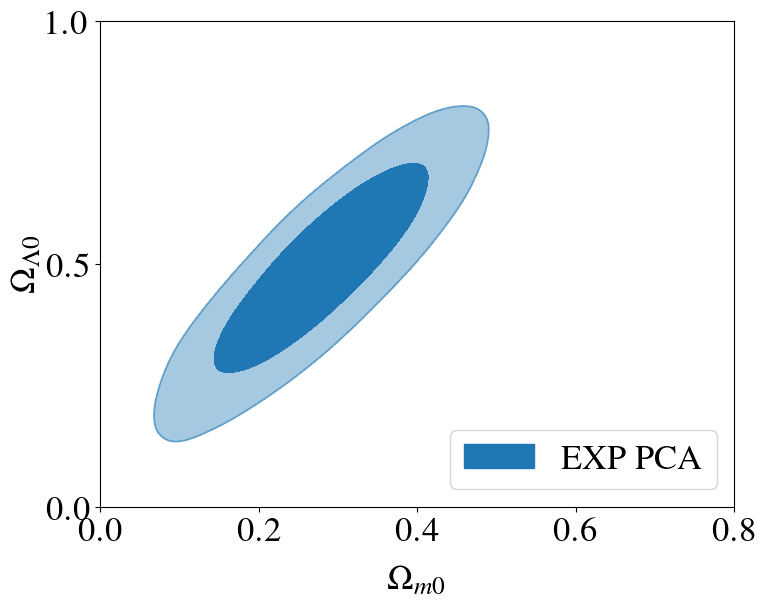

In [11]:
g = plots.get_single_plotter(width_inch=8, ratio=4 / 5.)
g.settings.axes_fontsize=25
g.settings.axes_labelsize=25
g.settings.legend_fontsize=25
g.plot_2d(samples_exp, ['Om', 'Ol'], filled=True, colors=["C0","C1"],lims=[0., 0.8,0., 1.]);
g.add_legend(["EXP PCA","SALT2"], legend_loc=4);
#plt.savefig('./OM_OL_plane_comparison_PCA.pdf')  

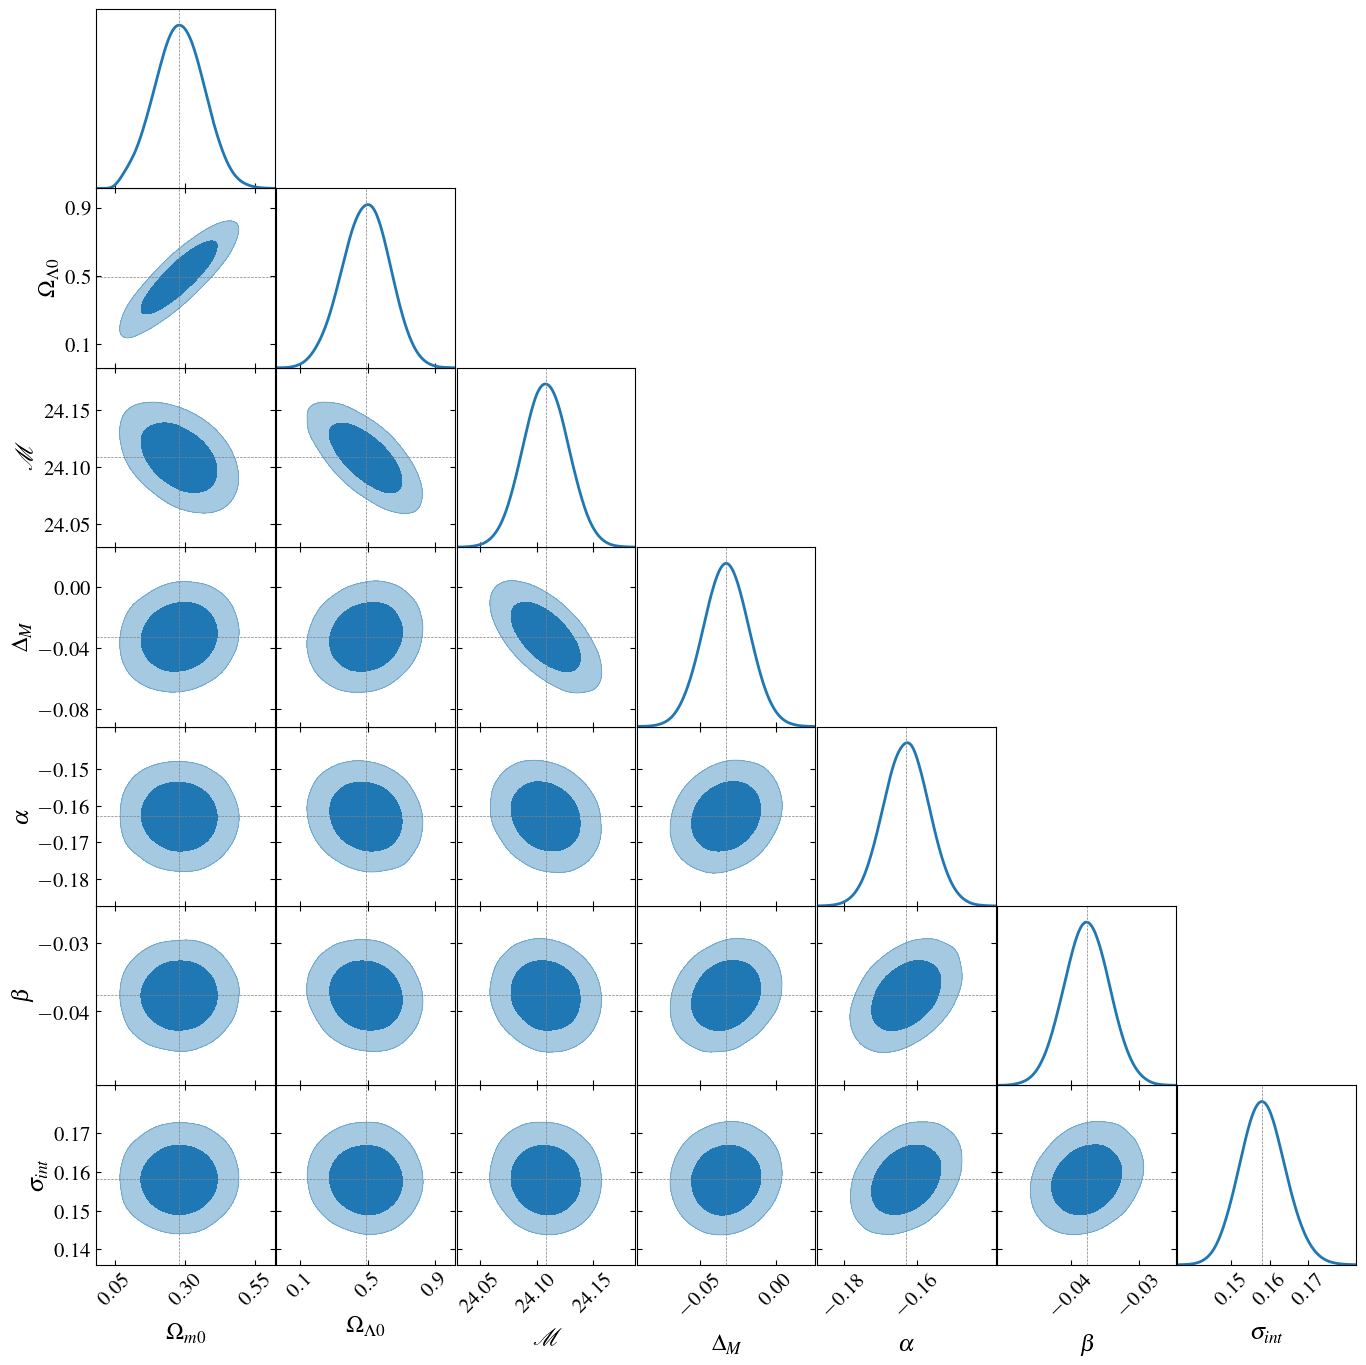

In [12]:
g = plots.get_subplot_plotter()
g.settings.axes_fontsize=18
g.settings.axes_labelsize=20
g.axis_tick_max_labels=10
g.settings.axis_tick_x_rotation=45
g.triangle_plot([samples_exp], filled=True, line_args=[{'lw':2., 'color':"C0"}], contour_colors=["C0"], markers={'Om':fit_results_exp["Om"][0],'Ol':fit_results_exp["Ol"][0],'M':fit_results_exp["M"][0],'deltaM':fit_results_exp["deltaM"][0],'a':fit_results_exp["a"][0],'b':fit_results_exp["b"][0],'sig':fit_results_exp["sig"][0]}, marker_args={'lw':0.5})
plt.savefig('./cosmology_results_EXP_PCA.pdf')  

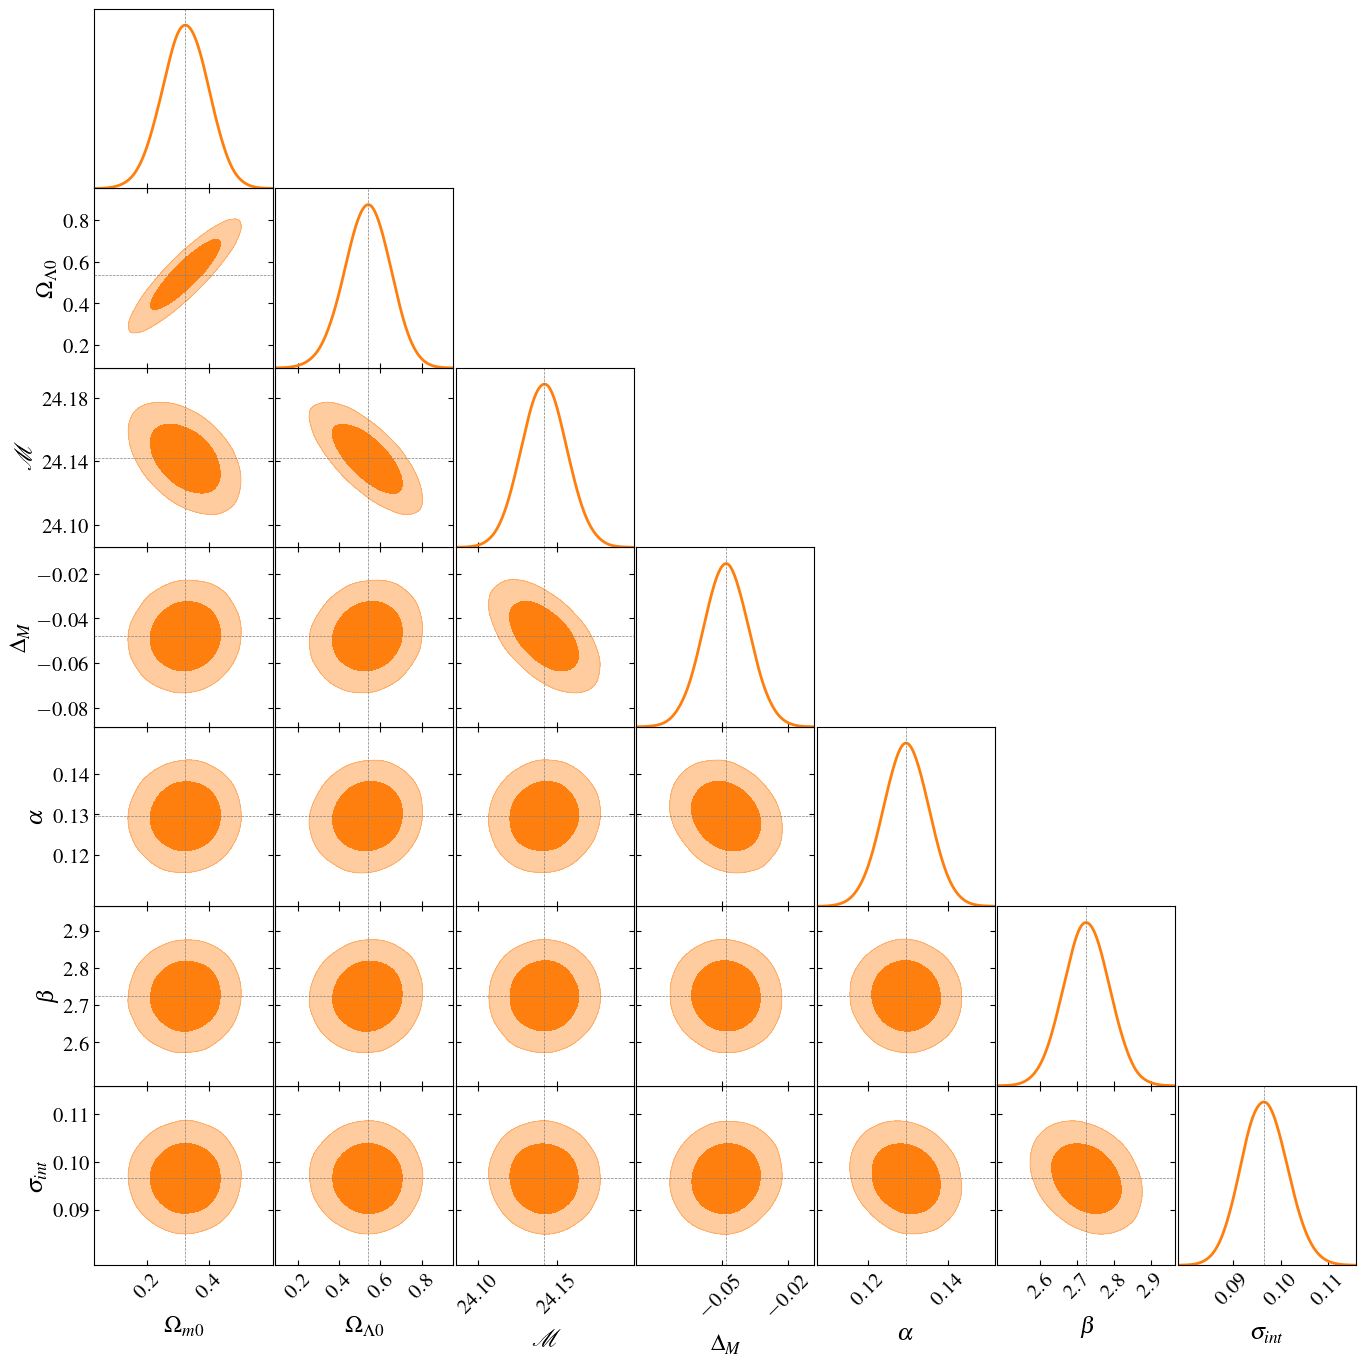

In [13]:
g = plots.get_subplot_plotter()
g.settings.axes_fontsize=18
g.settings.axes_labelsize=20
g.axis_tick_max_labels=10
g.settings.axis_tick_x_rotation=45
g.triangle_plot([samples_salt2], filled=True, line_args=[{'lw':2., 'color':"C1"}], contour_colors=["C1"], markers={'Om':fit_results_salt2["Om"][0],'Ol':fit_results_salt2["Ol"][0],'M':fit_results_salt2["M"][0],'deltaM':fit_results_salt2["deltaM"][0],'a':fit_results_salt2["a"][0],'b':fit_results_salt2["b"][0],'sig':fit_results_salt2["sig"][0]}, marker_args={'lw':0.5})
plt.savefig('./cosmology_results_SALT2_PCA_subsample.pdf')

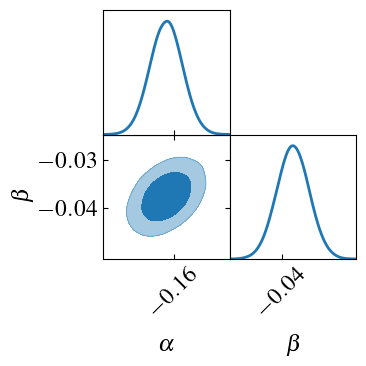

In [14]:
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.axes_fontsize=20
g.settings.axes_labelsize=20
g.axis_tick_max_labels=10
g.settings.axis_tick_x_rotation=45
g.settings.legend_fontsize=25
g.triangle_plot(samples_exp,params=['a', 'b'], filled=True,line_args={'lw':2., 'color':'C0'}, contour_colors=["C0"])
plt.savefig('./alpha_beta_triangle_plot_EXP_PCA.png',dpi=300,facecolor="white") 

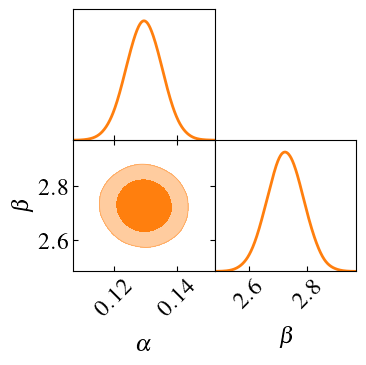

In [15]:
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.axes_fontsize=20
g.settings.axes_labelsize=20
g.axis_tick_max_labels=10
g.settings.axis_tick_x_rotation=45
g.settings.legend_fontsize=25
g.triangle_plot(samples_salt2,params=['a', 'b'], filled=True,line_args={'lw':2., 'color':'C1'}, contour_colors=["C1"])
plt.savefig('./alpha_beta_triangle_plot_SALT2_PCA_subsample.png',dpi=300,facecolor="white") 

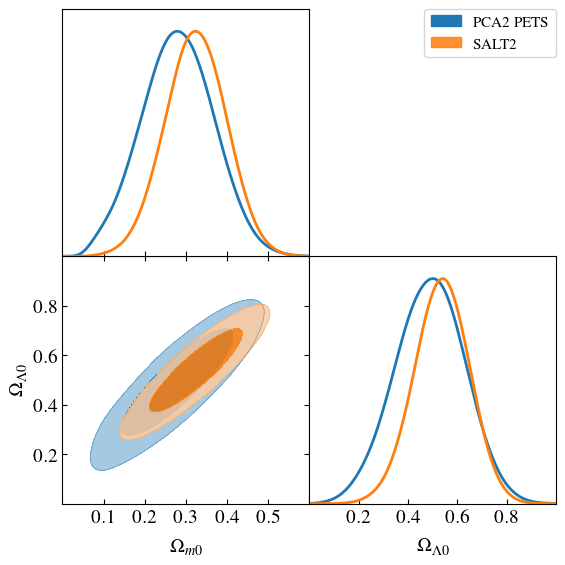

In [16]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.axes_fontsize=15
g.settings.axes_labelsize=15
#g.axis_tick_max_labels=10
#g.settings.axis_tick_x_rotation=45
#g.settings.legend_fontsize=30
g.triangle_plot([samples_exp, samples_salt2], ['Om', 'Ol'], filled=True,line_args=[{'lw':2., 'color':'C0'},{'lw':2, 'color':'C1'}], contour_colors=["C0","C1"])
a=g.get_axes(ax=(0,0))
a.set_xticks([0.1,0.2,0.3,0.4,0.5])
a.set_xlim(0.,0.6)
b=g.get_axes(ax=(1,0))
b.set_yticks([0.2,0.4,0.6,0.8])
b.set_ylim(0.,1.)
c=g.get_axes(ax=(1,1))
c.set_xticks([0.2,0.4,0.6,0.8])
c.set_xlim(0.,1.)
plt.savefig('./OM_OL_triangle_plot_comparison_PCA.png',dpi=300,facecolor='white', transparent=False,bbox_inches='tight');

## Hubble Diagram

In [17]:
def mu(Om,Ol,M,red):
    Ok=1.-Om-Ol 
    h_inv=lambda x: 1./np.sqrt(Om*(1+x)**3.+Ol+(1.-Om-Ol)*(1+x)**2.)
    integral=gk.integrate(h_inv,[np.array([0.]*len(red)),np.array(red)])
        
    if Ok==0:
        model=5*np.log10((1+red)*integral)+M
    elif Ok>0:
        model=5*np.log10((1+red)/np.sqrt(Ok)*np.sinh(np.sqrt(Ok)*integral))+M
    elif Ok<0:
        model=5*np.log10((1+red)/np.sqrt(-Ok)*np.sin(np.sqrt(-Ok)*integral))+M
    
    return model

In [18]:
fit_results_exp

{'Om': [0.2797534267522041, 0.08923162681142585, 0.08854872619903226],
 'Ol': [0.4913568013024926, 0.14475089839247274, 0.13895469799359195],
 'M': [24.10807415315388, 0.02008023458866859, 0.020130541585270834],
 'deltaM': [-0.032731420917028985, 0.014910162020861172, 0.014899706580541395],
 'a': [-0.1628953442799237, 0.006315840283270119, 0.006242587344045508],
 'b': [-0.037667531647731595, 0.003383886315702765, 0.0033662021785567306],
 'sig': [0.15805154307284558, 0.005840942772840446, 0.006022089247227691]}

In [19]:
fit_results_salt2

{'Om': [0.3239613186552023, 0.0750941035292651, 0.0741000191874539],
 'Ol': [0.5377886888491759, 0.11237074546831721, 0.10969972142541429],
 'M': [24.141891971265068, 0.014379149704563332, 0.014403648022444315],
 'deltaM': [-0.04800976534527583, 0.010246372048292235, 0.010274768510906036],
 'a': [0.12953182669775692, 0.005670736620761424, 0.005647650342668009],
 'b': [2.725149559847371, 0.062338980751744266, 0.06232942391935481],
 'sig': [0.09657363662501602, 0.0047438129057679745, 0.004884968898875422]}

In [20]:
Om=fit_results_exp["Om"][0]
Ol=fit_results_exp["Ol"][0]
M=fit_results_exp["M"][0]
deltaM=fit_results_exp["deltaM"][0]
alpha=fit_results_exp["a"][0]
beta=fit_results_exp["b"][0]
sigma=fit_results_exp["sig"][0]

In [21]:
data_exp=pd.read_csv("exp_PCA_fits_table.txt")

In [22]:
len(data_exp)

734

In [23]:
data_exp=data_exp.sort_values("z").reset_index(drop=True)

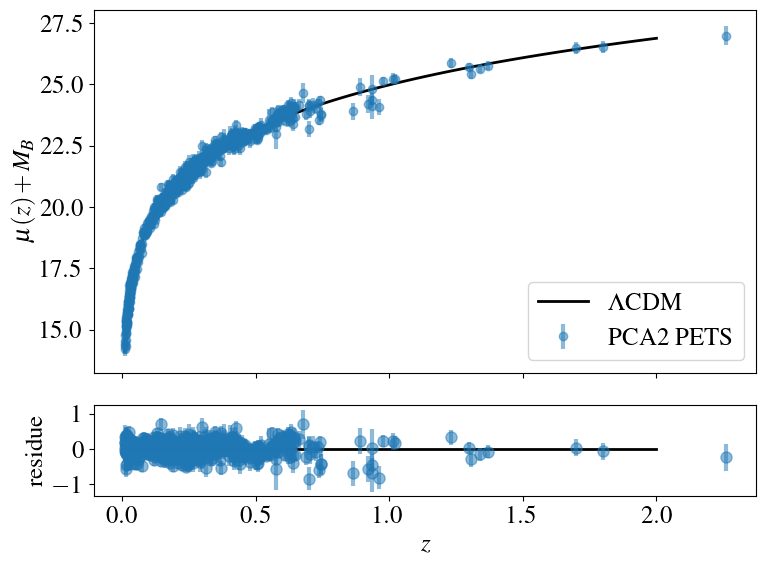

In [24]:
fig, ax=plt.subplots(2,1,figsize=(8,6),sharex=True,gridspec_kw={'height_ratios': [4, 1]})

#mu_exp=data_exp["mB"]-2.5*np.log10(1-alpha*data_exp["x1"]+beta*data_exp["x2"])-data_exp["is_log_mass_g_10"]*deltaM 
#fator=-2.5/(np.log(10.)*(1-alpha*data_exp["x1"]+beta*data_exp["x2"]))
#cov=-2.*alpha*fator*data_exp["cov_mB_x1"]+2*beta*fator*data_exp["cov_mB_x2"]-2*alpha*beta*fator**2*data_exp["cov_x1_x2"]
#muerr_exp=sigma**2+sigmaz**2+data_exp["mBerr"]**2+alpha**2*fator**2*data_exp["x1err"]**2+beta**2*fator**2*data_exp["x2err"]**2+cov

mu_exp=data_exp["mB"]+alpha*data_exp["x1"]+beta*data_exp["x2"]-data_exp["is_log_mass_g_10"]*deltaM 
sigmaz=0.0012*(5/np.log(10.))*(1.+data_exp["z"])/(data_exp["z"]*(1.+data_exp["z"]/2.))
cov=2.*alpha*data_exp["cov_mB_x1"]+2.*beta*data_exp["cov_mB_x2"]+2.*alpha*beta*data_exp["cov_x1_x2"]
muerr_exp=sigma**2+sigmaz**2.+data_exp["mBerr"]**2+alpha**2.*data_exp["x1err"]**2+beta**2.*data_exp["x2err"]**2.+cov      

ax[0].errorbar(data_exp["z"],mu_exp, yerr=np.sqrt(muerr_exp),ls="none",marker='o',markersize=6,color="C0",zorder=1,mec = 'C0', mfc = 'C0',elinewidth=3,label="PCA2 PETS",alpha=0.5)
ax[0].plot(np.linspace(0.01,2.,100),mu(Om,Ol,M,red=np.linspace(0.01,2.,100)),color="black",label=r"$\Lambda$CDM",lw=2,zorder=0)
ax[0].set_ylabel(r"$\mu(z) +M_B$")
ax[0].legend(loc=4)

ax[1].errorbar(data_exp["z"],mu_exp-mu(Om,Ol,M,red=data_exp["z"]),yerr=np.sqrt(muerr_exp),ls="none",marker='o',markersize=8,color="C0",zorder=1,mec = 'C0', mfc = 'C0',elinewidth=3,alpha=0.5)
ax[1].plot(np.linspace(0.01,2.,100),[0]*100,color="black",lw=2,zorder=0)
ax[1].set_ylabel("residue")
ax[1].set_xlabel(r"$z$")

fig.tight_layout()
plt.savefig('./HD_EXP_PCA.png',dpi=300,facecolor='white', transparent=False,bbox_inches='tight');

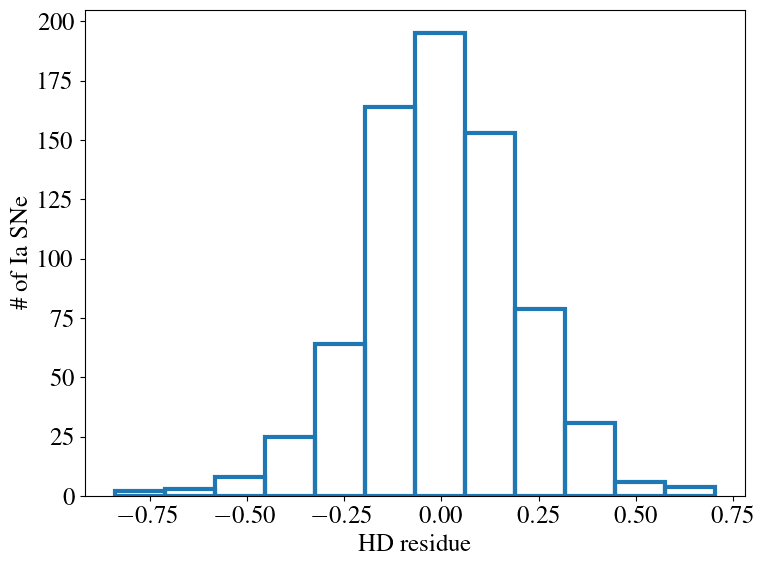

In [25]:
fig, ax=plt.subplots(figsize=(8,6))
                     
plt.hist(mu_exp-mu(Om,Ol,M,red=data_exp["z"]),bins=12,edgecolor="C0",fill=False,lw=3)
plt.ylabel("\\# of Ia SNe")
plt.xlabel("HD residue")
plt.tight_layout()
plt.savefig('./HD_hist_residue_EXP_PCA.pdf',dpi=300);

In [26]:
np.mean(mu_exp-mu(Om,Ol,M,red=data_exp["z"]))

-0.0019471136560300427

In [27]:
np.std(mu_exp-mu(Om,Ol,M,red=data_exp["z"]))

0.2031451991814943

In [28]:
import scipy

In [29]:
scipy.stats.skew(mu_exp-mu(Om,Ol,M,red=data_exp["z"]))

-0.23535278341325805

In [30]:
res=mu_exp-mu(Om,Ol,M,red=data_exp["z"])
print(stats.skew(res))
print(stats.skew(res[res<0.5]))

-0.23535278341325805
-0.409315064343251


In [31]:
np.std(res[res<0.5])

0.19767788144577497

In [32]:
df_residue=pd.DataFrame(mu_exp-mu(Om,Ol,M,red=data_exp["z"]))
df_mu_err=pd.DataFrame(muerr_exp)
df_w_res=pd.concat((df_residue,df_mu_err),axis=1)
df_w_res.columns=["residue","mu_err_exp"]

In [33]:
data_exp_w_res=pd.concat((data_exp,df_w_res),axis=1)

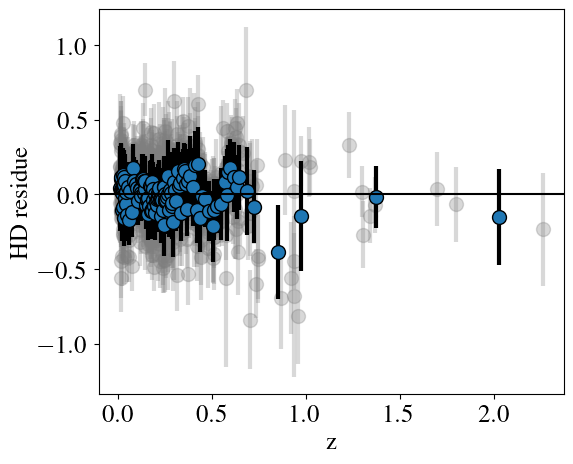

In [34]:
fig=plt.figure(figsize=(6,5))

data_z_sorted=data_exp_w_res.sort_values("z").reset_index(drop=True)
bins_z=[]
bins_res=[]
bins_err_res=[]
i=0
while i <len(data_z_sorted):
    bins_z.append(np.mean(data_z_sorted["z"][i:i+6]))
    bins_res.append(np.mean(data_z_sorted["residue"][i:i+6]))
    bins_err_res.append(np.mean(data_z_sorted["mu_err_exp"][i:i+6]))
    i+=6

plt.errorbar(data_z_sorted["z"],data_z_sorted["residue"],yerr=np.sqrt(data_z_sorted["mu_err_exp"]),ls="none",marker='o',markersize=10,color="C7",zorder=0,elinewidth=3,alpha=0.3)
plt.errorbar(bins_z,bins_res,yerr=np.sqrt(bins_err_res),marker='o',ls='none',markersize=10,color="black",zorder=1,mec = 'black', mfc = 'C0',elinewidth=3)
#plt.plot(bins_z,bins_res,marker='o',ls='none',markersize=3,color="black",zorder=1)
plt.axhline(y = 0., color = 'black', linestyle = '-')
#plt.errorbar(data_exp["z"],mu_exp-mu(Om,Ol,M,red=data_exp["z"]),yerr=np.sqrt(muerr_exp),ls="none",marker='o',markersize=3,color="#35b779")
plt.xlabel("z")
plt.ylabel("HD residue");

In [35]:
data_mB_sorted=data_exp_w_res.sort_values("mB").reset_index(drop=True)
bins_mB=[]
bins_res2=[]
bins_err_res2=[]
i=0
while i <len(data_z_sorted):
    bins_mB.append(np.mean(data_mB_sorted["mB"][i:i+6]))
    bins_res2.append(np.mean(data_mB_sorted["residue"][i:i+6]))
    bins_err_res2.append(np.mean(data_mB_sorted["mu_err_exp"][i:i+6]))
    i+=6

In [36]:
data_x1_sorted=data_exp_w_res.sort_values("x1").reset_index(drop=True)
bins_x1=[]
bins_res3=[]
bins_err_res3=[]
i=0
while i <len(data_z_sorted):
    bins_x1.append(np.mean(data_x1_sorted["x1"][i:i+10]))
    bins_res3.append(np.mean(data_x1_sorted["residue"][i:i+10]))
    bins_err_res3.append(np.mean(data_x1_sorted["mu_err_exp"][i:i+10]))
    i+=10

In [37]:
data_x2_sorted=data_exp_w_res.sort_values("x2").reset_index(drop=True)
bins_x2=[]
bins_res4=[]
bins_err_res4=[]
i=0
while i <len(data_x2_sorted):
    bins_x2.append(np.mean(data_x2_sorted["x2"][i:i+10]))
    bins_res4.append(np.mean(data_x2_sorted["residue"][i:i+10]))
    bins_err_res4.append(np.mean(data_x2_sorted["mu_err_exp"][i:i+10]))
    i+=10

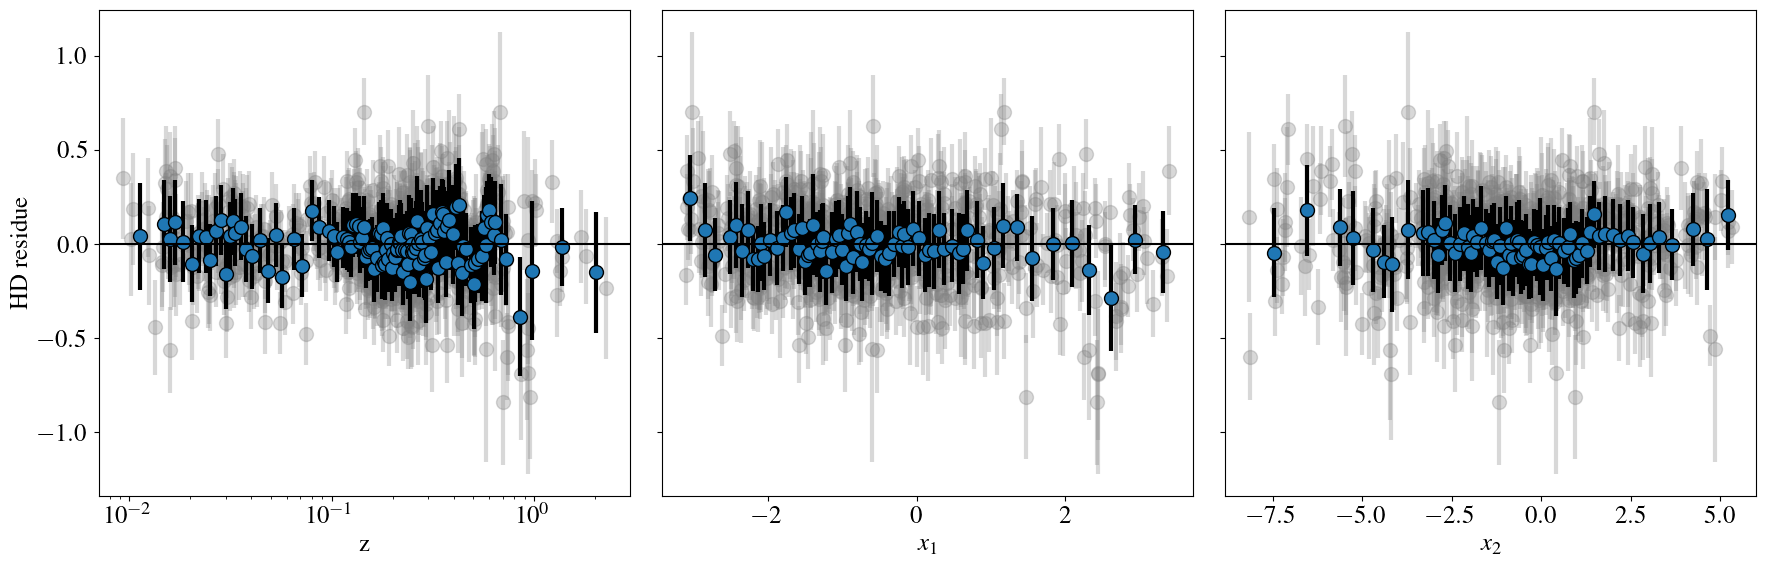

In [38]:
fig, axs=plt.subplots(1,3,figsize=(18,6),sharey=True)

axs[0].errorbar(data_z_sorted["z"],data_z_sorted["residue"],yerr=np.sqrt(data_z_sorted["mu_err_exp"]),ls="none",marker='o',markersize=10,color="C7",zorder=0,elinewidth=3,alpha=0.3)
axs[0].errorbar(bins_z,bins_res,yerr=np.sqrt(bins_err_res),marker='o',ls='none',markersize=10,color="black",zorder=1,mec = 'black', mfc = 'C0',elinewidth=3)
axs[0].axhline(y = 0., color = 'black', linestyle = '-')
axs[0].set_xlabel("z")
axs[0].set_xscale('log')
axs[0].set_ylabel("HD residue")

#axs[1].errorbar(data_mB_sorted["mB"],data_mB_sorted["residue"],yerr=np.sqrt(data_mB_sorted["mu_err_exp"]),ls="none",marker='o',markersize=10,color="C7",zorder=0,elinewidth=3,alpha=0.3)
#axs[1].errorbar(bins_mB,bins_res2,yerr=np.sqrt(bins_err_res2),ls="none",marker='o',markersize=10,color="black",zorder=1,mec = 'black', mfc = 'C2',elinewidth=3)
#axs[1].axhline(y = 0., color = 'black', linestyle = '-')
#axs[1].set_xlabel(r"$m_B^*$")

axs[1].errorbar(data_x1_sorted["x1"],data_x1_sorted["residue"],yerr=np.sqrt(data_x1_sorted["mu_err_exp"]),ls="none",marker='o',markersize=10,color="C7",zorder=0,elinewidth=3,alpha=0.3)
axs[1].errorbar(bins_x1,bins_res3,yerr=np.sqrt(bins_err_res3),ls="none",marker='o',markersize=10,color="black",zorder=1,mec = 'black', mfc = 'C0',elinewidth=3)
axs[1].axhline(y = 0., color = 'black', linestyle = '-')
axs[1].set_xlabel(r"$x_1$")

axs[2].errorbar(data_x2_sorted["x2"],data_x2_sorted["residue"],yerr=np.sqrt(data_x2_sorted["mu_err_exp"]),ls="none",marker='o',markersize=10,color="C7",zorder=0,elinewidth=3,alpha=0.3)
axs[2].errorbar(bins_x2,bins_res4,yerr=np.sqrt(bins_err_res4),ls="none",marker='o',markersize=10,color="black",zorder=1,mec = 'black', mfc = 'C0',elinewidth=3)
axs[2].axhline(y = 0., color = 'black', linestyle = '-')
axs[2].set_xlabel(r"$x_2$")

plt.tight_layout()
plt.savefig('./HD_residue_dependences_PCA.png',dpi=300,facecolor="white") 

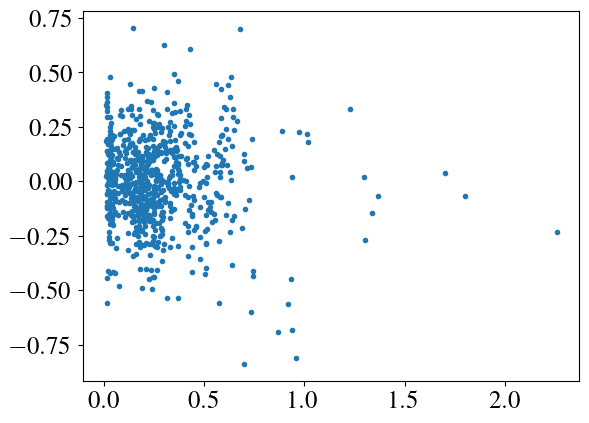

In [39]:
plt.plot(data_z_sorted["z"],data_z_sorted["residue"],'.')

#### Comparisons with Host galaxy mass

In [40]:
reduced_data=data_exp_w_res[(data_exp_w_res["log_hm"]>=8.) & (data_exp_w_res["log_hm"]<=12.)]
data_log_hm_sorted=reduced_data.sort_values("log_hm").reset_index(drop=True)
bins_x1=[]
bins_x2=[]
bins_loghm=[]
bins_res=[]
i=0
while i <len(reduced_data):
    bins_x1.append(np.mean(data_log_hm_sorted["x1"][i:i+25]))
    bins_x2.append(np.mean(data_log_hm_sorted["x2"][i:i+25]))
    bins_loghm.append(np.mean(data_log_hm_sorted["log_hm"][i:i+25]))
    bins_res.append(np.mean(data_log_hm_sorted["residue"][i:i+25]))
    i+=25

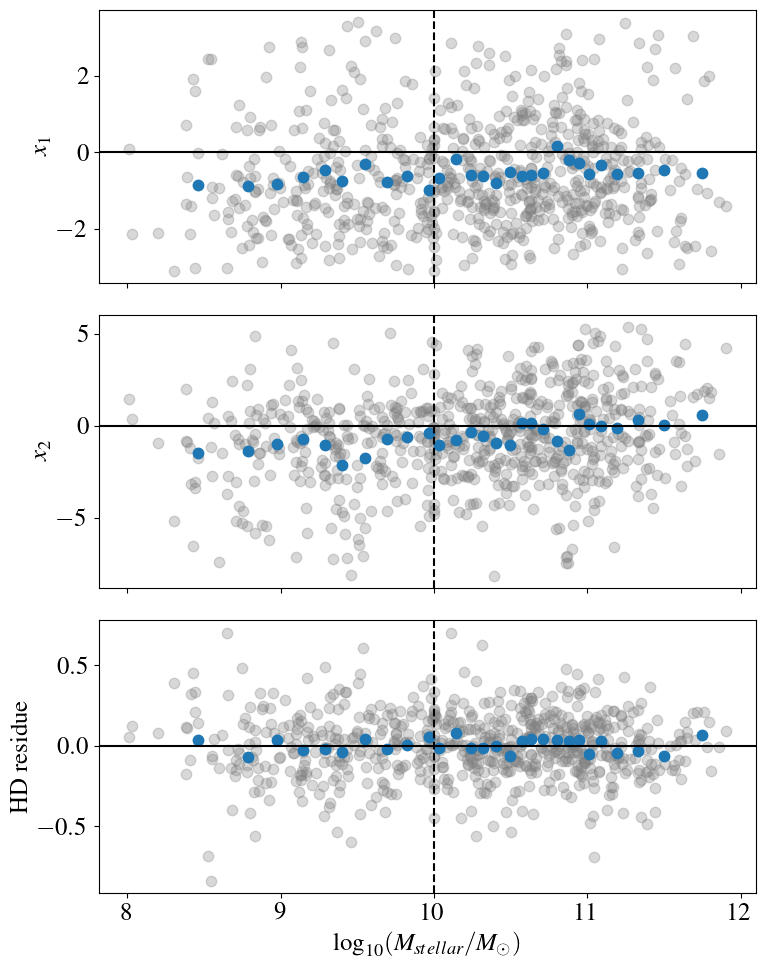

In [41]:
fig, axs=plt.subplots(3,1,figsize=(8,10),sharex=True)

axs[0].plot(reduced_data["log_hm"],reduced_data["x1"],'.',markersize=15,c="C7",alpha=0.3)
axs[0].plot(bins_loghm,bins_x1,".",markersize=15)
axs[0].axhline(0.,c="k")
axs[0].axvline(10.,ls="--",c="k")
axs[0].set_ylabel(r"$x_1$")

axs[1].plot(reduced_data["log_hm"],reduced_data["x2"],'.',markersize=15,c="C7",alpha=0.3)
axs[1].plot(bins_loghm,bins_x2,".",markersize=15)
axs[1].axhline(0.,c="k")
axs[1].axvline(10.,ls="--",c="k")
axs[1].set_ylabel(r"$x_2$")

axs[2].plot(reduced_data["log_hm"],reduced_data["residue"],'.',markersize=15,c="C7",alpha=0.3)
axs[2].plot(bins_loghm,bins_res,".",markersize=15)
axs[2].axhline(0.,c="k")
axs[2].axvline(10.,ls="--",c="k")
axs[2].set_xlabel(r"$\log_{10}(M_{stellar}/M_{\odot})$")
axs[2].set_ylabel("HD residue")

plt.tight_layout()
plt.savefig('./parameters_dep_w_host_mass_PCA.png',dpi=300,facecolor="white") 

## Distance modulus differences scatter plot

In [42]:
Om_salt2=fit_results_salt2["Om"][0]
Ol_salt2=fit_results_salt2["Ol"][0]
M_salt2=fit_results_salt2["M"][0]
deltaM_salt2=fit_results_salt2["deltaM"][0]
alpha_salt2=fit_results_salt2["a"][0]
beta_salt2=fit_results_salt2["b"][0]
sigma_salt2=fit_results_salt2["sig"][0]

In [43]:
data_salt2=pd.read_csv("SALT2_PCA_subsample_fits_table.txt")

In [44]:
data_salt2=data_salt2.sort_values("z").reset_index(drop=True)

In [45]:
mu_salt2=data_salt2["mB"]+alpha_salt2*data_salt2["x1"]-beta_salt2*data_salt2["x2"]-data_salt2["is_log_mass_g_10"]*deltaM_salt2

sigmaz=0.0012*(5/np.log(10.))*(1.+data_salt2["z"])/(data_salt2["z"]*(1.+data_salt2["z"]/2.))

cov=2.*alpha_salt2*data_salt2["cov_mB_x1"]+2*beta_salt2*data_salt2["cov_mB_x2"]-2*alpha_salt2*beta_salt2*data_salt2["cov_x1_x2"]
muerr_salt2=sigma_salt2**2+sigmaz**2+data_salt2["mBerr"]**2+alpha_salt2**2*data_salt2["x1err"]**2+beta_salt2**2*data_salt2["x2err"]**2+cov

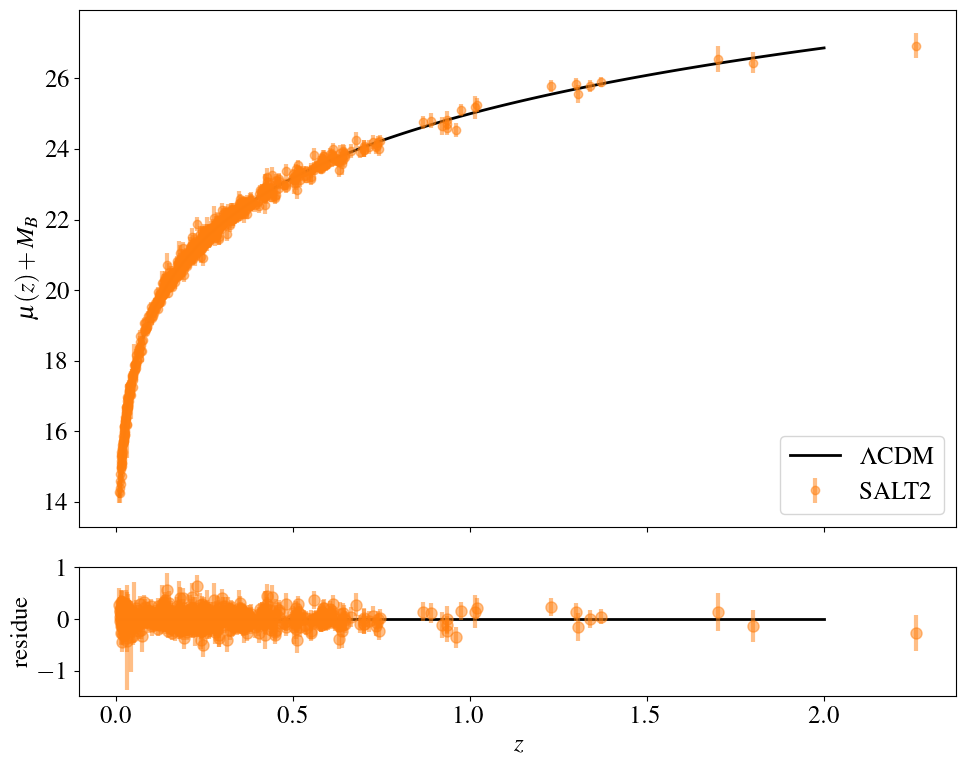

In [46]:
fig, ax=plt.subplots(2,1,figsize=(10,8),sharex=True,gridspec_kw={'height_ratios': [4, 1]})

ax[0].errorbar(data_salt2["z"],mu_salt2, yerr=np.sqrt(muerr_salt2),ls="none",marker='o',markersize=6,color="C1",zorder=1,mec = 'C1', mfc = 'C1',elinewidth=3,label="SALT2",alpha=0.5)
ax[0].plot(np.linspace(0.01,2.,100),mu(Om_salt2,Ol_salt2,M_salt2,red=np.linspace(0.01,2.,100)),color="black",label=r"$\Lambda$CDM",lw=2,zorder=0)
ax[0].set_ylabel(r"$\mu(z) +M_B$")
ax[0].legend(loc=4)

ax[1].errorbar(data_salt2["z"],mu_salt2-mu(Om_salt2,Ol_salt2,M_salt2,red=data_salt2["z"]),yerr=np.sqrt(muerr_salt2),ls="none",marker='o',markersize=8,color="C1",zorder=1,mec = 'C1', mfc = 'C1',elinewidth=3,alpha=0.5)
ax[1].plot(np.linspace(0.01,2.,100),[0]*100,color="black",lw=2,zorder=0)
ax[1].set_ylabel("residue")
ax[1].set_xlabel(r"$z$")

fig.tight_layout();

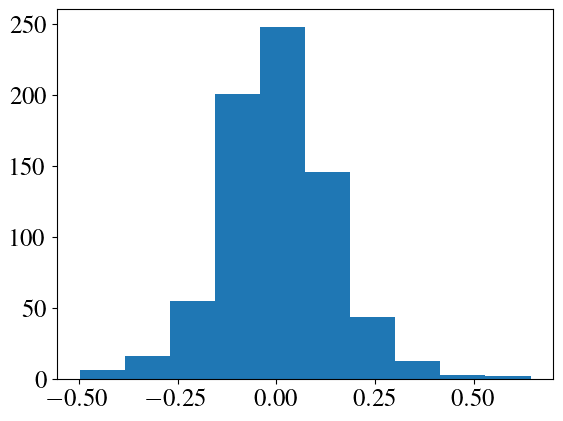

In [47]:
hd_res_salt2=mu_salt2-mu(Om_salt2,Ol_salt2,M_salt2,red=data_salt2["z"])
plt.hist(hd_res_salt2);

In [48]:
ks_2samp(mu_salt2,mu_exp)

KstestResult(statistic=0.027247956403269755, pvalue=0.9483434802411095, statistic_location=21.29647508190779, statistic_sign=-1)

In [49]:
np.mean(hd_res_salt2)

0.0012884956718747398

In [50]:
np.std(hd_res_salt2)

0.14303899623973257

In [51]:
len(data_salt2)

734

In [52]:
bins_z_comp=[]
bins_dif_comp=[]
mu_dif=mu_salt2-mu_exp
mu_dif_per_bin=[]
std=[]
i=0
while i<len(data_salt2):
    bins_z_comp.append(np.mean(data_salt2["z"][i:i+20]))
    bins_dif_comp.append(np.mean(mu_dif[i:i+20]))
    std.append(np.std(mu_dif[i:i+20]))
    mu_dif_per_bin.append(mu_dif[i:i+20])
    i+=20

(array([  5.,   8.,  35., 240., 296., 123.,  13.,   8.,   2.,   4.]),
 array([-0.6023215 , -0.45278901, -0.30325653, -0.15372404, -0.00419155,
         0.14534093,  0.29487342,  0.44440591,  0.59393839,  0.74347088,
         0.89300337]),
 <BarContainer object of 10 artists>)

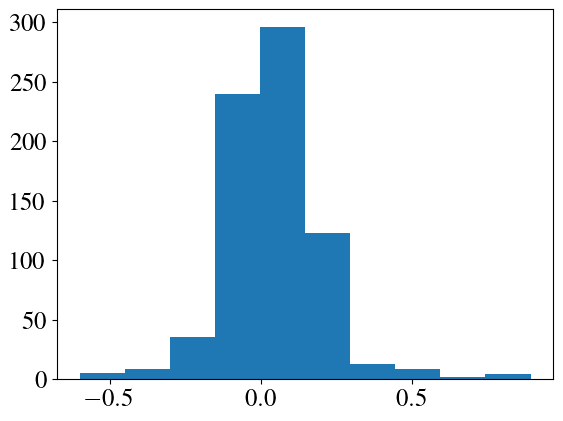

In [53]:
plt.hist(mu_dif)

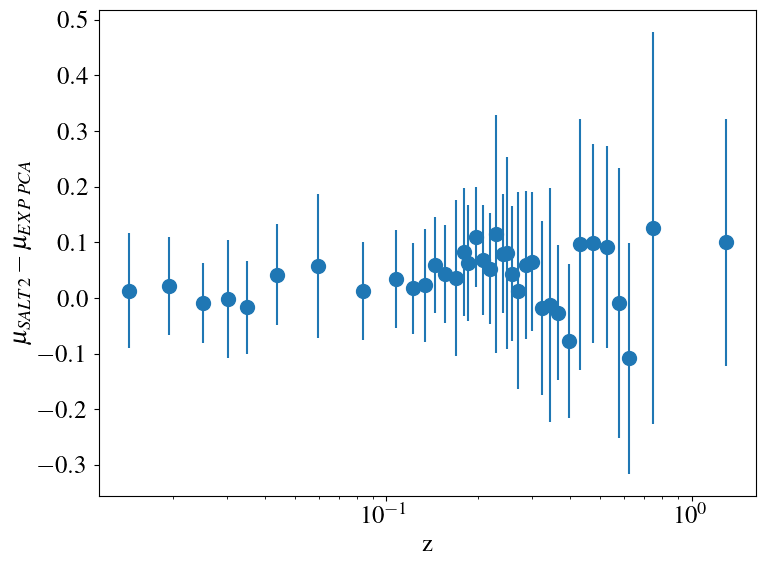

In [54]:
fig=plt.figure(figsize=(8,6))

#plt.plot(data_salt2["z"],mu_salt2-mu_exp,'.',markersize=15,alpha=0.6,c="C7")
plt.errorbar(bins_z_comp,bins_dif_comp,yerr=std,marker='o',markersize=10,c="C0",ls="none")
plt.xlabel("z")
plt.ylabel(r"$\mu_{SALT2}-\mu_{EXP\,\, PCA}$")
plt.xscale("log")
plt.tight_layout()
plt.savefig('./distance_mod_dif_evol_w_z_PCA.pdf',dpi=300);

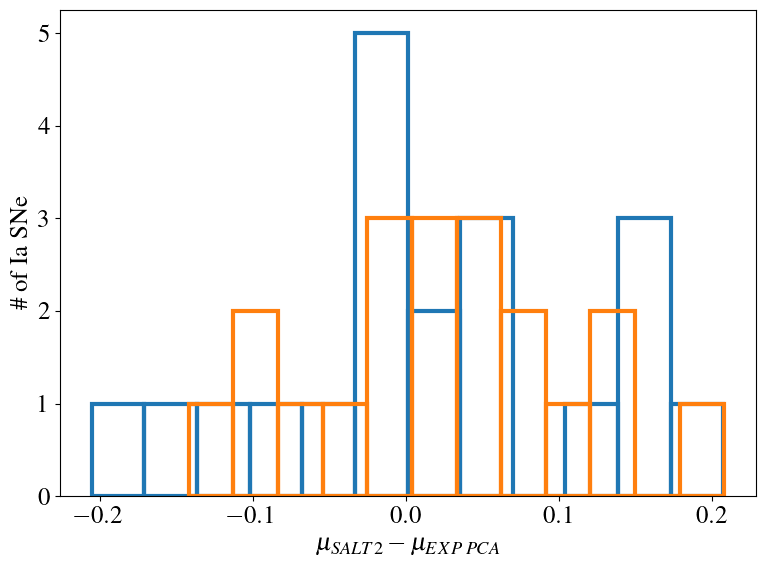

In [55]:
fig=plt.figure(figsize=(8,6))
                     
plt.hist(mu_dif_per_bin[0],bins=12,edgecolor="C0",fill=False,lw=3)
plt.hist(mu_dif_per_bin[1],bins=12,edgecolor="C1",fill=False,lw=3)
plt.ylabel("\\# of Ia SNe")
plt.xlabel("$\\mu_{SALT2}-\\mu_{EXP\\,\\, PCA}$")
plt.tight_layout()

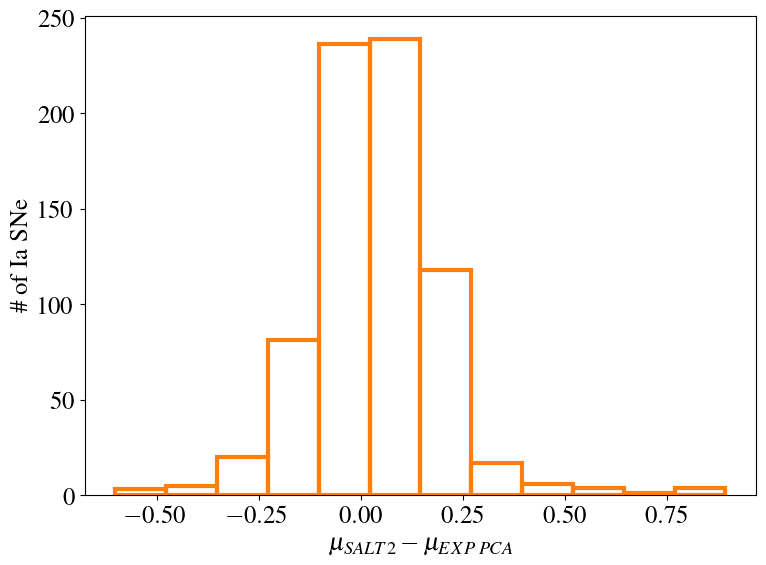

In [56]:
fig=plt.figure(figsize=(8,6))
                     
plt.hist(mu_salt2-mu_exp,bins=12,edgecolor="C1",fill=False,lw=3)
plt.ylabel("\\# of Ia SNe")
plt.xlabel("$\\mu_{SALT2}-\\mu_{EXP\\,\\, PCA}$")
plt.tight_layout()
plt.savefig('./distance_mod_dif_PCA.pdf',dpi=300);

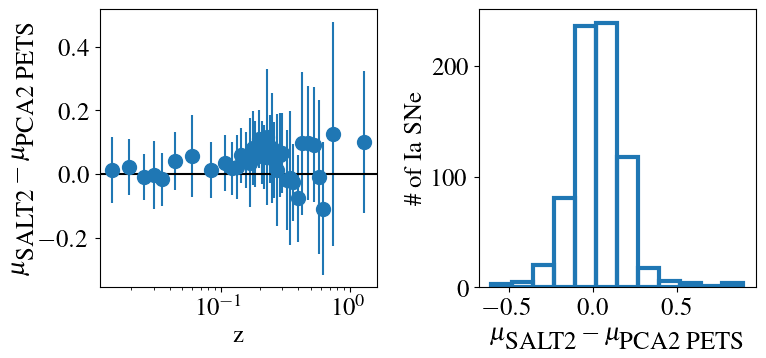

In [57]:
fig,axs=plt.subplots(1,2,figsize=(8,4))

axs[0].errorbar(bins_z_comp,bins_dif_comp,yerr=std,c="C0",marker='o',markersize=10,ls="none")
axs[0].set_xlabel("z")
axs[0].set_ylabel(r"$\mu_{\textrm{SALT2}}-\mu_{\textrm{PCA2 PETS}}$")
axs[0].set_xscale("log")
axs[0].axhline(y=0.,c="k")

axs[1].hist(mu_salt2-mu_exp,bins=12,edgecolor="C0",fill=False,lw=3)
axs[1].set_ylabel("\\# of Ia SNe")
axs[1].set_xlabel(r"$\mu_{\textrm{SALT2}}-\mu_{\textrm{PCA2 PETS}}$")

fig.tight_layout()
plt.savefig('./distance_mod_dif_evol_w_z_hist_PCA.png',dpi=300,facecolor='white', transparent=False,bbox_inches='tight');

In [58]:
np.polyfit(bins_z_comp,std,1)

array([0.18177231, 0.08951688])

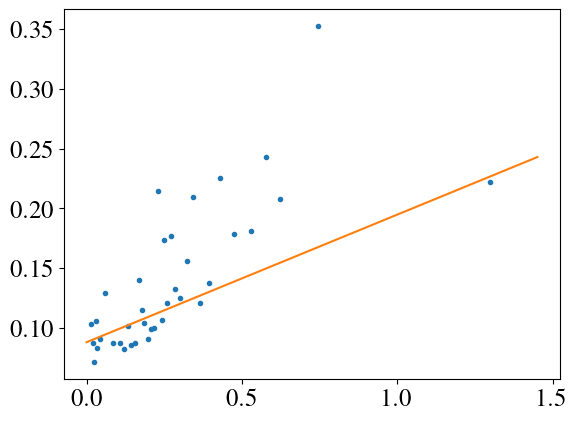

In [59]:
plt.plot(bins_z_comp,std,'.')
plt.plot(np.arange(0,1.5,0.05), np.arange(0,1.5,0.05)*0.1067255 + 0.08817563)

In [60]:
np.mean(mu_salt2-mu_exp)

0.037803572756420205

In [61]:
np.std(mu_salt2-mu_exp)

0.15906033639633

In [62]:
stats.skew(mu_salt2-mu_exp)

0.7028377328505597

### Massa da galáxia hospedeira em função do survey

In [63]:
snls=pd.read_csv("../snls_pantheon.txt",header=None).values.reshape(-1)

In [64]:
sdss=pd.read_csv("../sdss_pantheon.txt",header=None,dtype=str).values.reshape(-1)

In [65]:
hst=[]
for file in glob.glob("../light_curves/Pantheon/Pantheon_HST_TEXT/*.DAT"):
    hst.append(file.split("_")[4].split(".")[0])
for file in glob.glob("../light_curves/Pantheon/Pantheon_HST_TEXT/*.dat"):
    hst.append(file.split("_")[-1].split(".")[0])

In [66]:
lowz=[]
for file in glob.glob("../light_curves/Pantheon/Pantheon_LOWZ_TEXT/*.DAT"):
    lowz.append(file.split("_")[5].split(".")[0])
for file in glob.glob("../light_curves/Pantheon/Pantheon_LOWZ_TEXT/*.dat"):
    lowz.append(file.split("_")[-1].split(".")[0])

In [67]:
ps1=[]
for file in glob.glob("../light_curves/Pantheon/Pantheon_PS1MD_TEXT/*.txt"):
    ps1.append(str(int(file.split("_")[4].split(".")[0][3:])))

In [68]:
surv={}

In [69]:
PS1_sn=[]
SNLS_sn=[]
SDSS_sn=[]
LOWZ_sn=[]

In [70]:
 for sn in data_exp["sn"].values:
    if sn in snls:
        SNLS_sn.append(sn)
    elif sn in sdss:
        SDSS_sn.append(sn)
    elif sn in hst:
        continue
    elif sn in lowz:
        LOWZ_sn.append(sn)
    elif sn in ps1:
        PS1_sn.append(sn)
    elif sn.lower():
        continue
    else:
        print(sn)

In [71]:
PS1_log_hm=[data_exp[data_exp["sn"]==s]["log_hm"].values[0] for s in PS1_sn]
SNLS_log_hm=[data_exp[data_exp["sn"]==s]["log_hm"].values[0] for s in SNLS_sn]
SDSS_log_hm=[data_exp[data_exp["sn"]==s]["log_hm"].values[0] for s in SDSS_sn]
LOWZ_log_hm=[data_exp[data_exp["sn"]==s]["log_hm"].values[0] for s in LOWZ_sn]

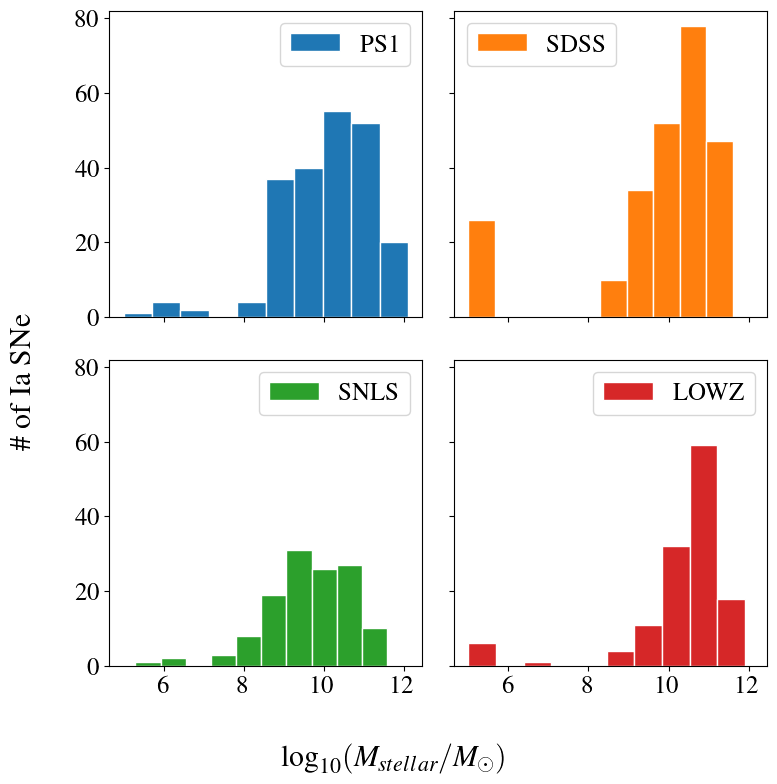

In [72]:
fig, axs=plt.subplots(2,2,figsize=(8,8),sharex=True,sharey=True)

axs[0,0].hist(PS1_log_hm,label="PS1",color="C0", edgecolor='white')
axs[0,0].legend()
axs[0,1].hist(SDSS_log_hm,label="SDSS",color="C1", edgecolor='white')
axs[0,1].legend()
axs[1,0].hist(SNLS_log_hm,label="SNLS",color="C2", edgecolor='white')
axs[1,0].legend()
axs[1,1].hist(LOWZ_log_hm,label="LOWZ",color="C3", edgecolor='white')
axs[1,1].legend()

fig.supxlabel(r"$\log_{10}(M_{stellar}/M_{\odot})$")
fig.supylabel(r"\# of Ia SNe")
fig.tight_layout()
plt.savefig('./distribution_hostmass_PCA.png',dpi=300,facecolor="white") 

## Color code scatter 

In [73]:
surv=[]
for sn in data_exp["sn"]:
    if sn in snls:
        surv.append("snls")
    elif sn in sdss:
        surv.append("sdss")
    elif sn in hst:
        surv.append("hst")
    elif sn in lowz:
        surv.append("lowz")
    elif sn in ps1:
        surv.append("ps1")
    elif sn.lower():
        surv.append("hst")
    else:
        print(sn)   

In [74]:
data_exp["survey"]=surv

In [75]:
sorted_df_mb=data_exp.sort_values("mB").reset_index(drop=True)

In [76]:
bins_mb_sort=[]
bins_x1_mb_sort=[]
bins_x1_std_mb_sort=[]
bins_x2_mb_sort=[]
bins_x2_std_mb_sort=[]
most_freq_surv_x1=[]
i=0
step=40
while i< len(sorted_df_mb):
    bins_mb_sort.append(np.mean(sorted_df_mb["mB"][i:i+step]))
    bins_x1_mb_sort.append(np.mean(sorted_df_mb["x1"][i:i+step]))
    bins_x1_std_mb_sort.append(np.std(sorted_df_mb["x1"][i:i+step]))
    most_freq_surv_x1.append(sorted_df_mb["survey"][i:i+step].value_counts().keys()[0])
    bins_x2_mb_sort.append(np.mean(sorted_df_mb["x2"][i:i+step]))
    bins_x2_std_mb_sort.append(np.std(sorted_df_mb["x2"][i:i+step]))
    i+=step

In [77]:
marker=[]
color_x1=[]
for item in most_freq_surv_x1:
    if item=="lowz":
        color_x1.append("C0")
        marker.append("o")
    if item=="sdss":
        color_x1.append("C1")
        marker.append("^")
    if item=="ps1":
        color_x1.append("C2")
        marker.append("s")
    if item=="snls":
        color_x1.append("C3")
        marker.append("*")
    if item=="hst":
        color_x1.append("C4")
        marker.append("d")

In [78]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax2.legend(*zip(*unique), bbox_to_anchor=(1, 1))

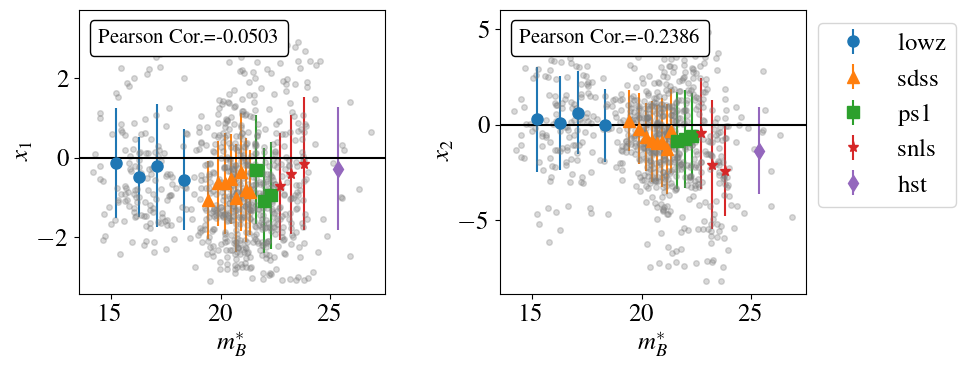

In [79]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(10,4))

for i in range(len(bins_mb_sort)):
    ax1.errorbar(bins_mb_sort[i],bins_x1_mb_sort[i],yerr=bins_x1_std_mb_sort[i],color=color_x1[i],marker=marker[i], markersize=8,ls="none")
    
ax1.plot(data_exp["mB"],data_exp["x1"],".",c="C7",markersize=8,alpha=0.3)
#ax1.errorbar(bins_mb_sort,bins_x1_mb_sort,yerr=bins_x1_std_mb_sort,marker="o", markersize=8,ls="none")
ax1.axhline(y=0.,c="k")
ax1.set_ylabel(r"$x_1$")
ax1.set_xlabel(r"$m_B^*$")
at1 = AnchoredText("Pearson Cor.=%.4f"%(round(np.corrcoef(data_exp["mB"],data_exp["x1"])[0][1],4)), prop=dict(size=15), frameon=True, loc='upper left')
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at1)

for i in range(len(bins_mb_sort)):
    ax2.errorbar(bins_mb_sort[i],bins_x2_mb_sort[i],yerr=bins_x2_std_mb_sort[i],color=color_x1[i],label=most_freq_surv_x1[i],marker=marker[i], markersize=8,ls="none")

ax2.plot(data_exp["mB"],data_exp["x2"],'.',c="C7",markersize=8,alpha=0.3)
#ax2.errorbar(bins_mb_sort,bins_x2_mb_sort,yerr=bins_x2_std_mb_sort,marker="o", markersize=8,ls="none")
ax2.axhline(y=0.,c="k")
ax2.set_ylabel(r"$x_2$")
ax2.set_xlabel(r"$m_B^*$")
at2 = AnchoredText("Pearson Cor.=%.4f"%(round(np.corrcoef(data_exp["mB"],data_exp["x2"])[0][1],4)), prop=dict(size=15), frameon=True, loc='upper left')
at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at2)
legend_without_duplicate_labels(ax2)

fig.tight_layout()
plt.savefig('./parameters_dep_w_mB_PCA_colored.png',dpi=300,facecolor="white")  

## Color code scatter distance modulus

In [80]:
data_exp["mb_minus_mu"]=data_exp["mB"]-mu(Om,Ol,M,data_exp["z"])

In [81]:
sorted_df_mbmu=data_exp.sort_values("mb_minus_mu").reset_index(drop=True)

In [82]:
sorted_df_mbmu

,sn,log_hm,z,zerr,mB,mBerr,x1,x1err,x2,x2err,cov_mB_x1,cov_mB_x2,cov_x1_x2,is_log_mass_g_10,survey,mb_minus_mu
0,390471,10.5040,0.370400,0.001,21.545375,0.035837,-1.582479,0.510790,-0.323122,1.700685,0.002589,-0.051134,0.086405,1.0,ps1,-0.837262
1,20142,9.3650,0.314679,0.005,21.190211,0.029837,-0.966678,0.772646,-2.411682,4.235498,0.008494,-0.003892,-0.335254,0.0,sdss,-0.785134
2,370369,11.3870,0.191200,0.010,19.992673,0.020088,-2.618648,0.261397,4.709003,0.554247,0.003763,-0.006491,-0.070366,1.0,ps1,-0.769936
3,470008,10.3869,0.239600,0.010,20.583808,0.023599,-1.459144,0.319556,1.165823,1.382130,0.006799,-0.016721,-0.206352,1.0,ps1,-0.722354
4,18486,5.0000,0.245403,0.005,20.650409,0.027084,-2.806229,0.622550,-1.405336,0.991616,0.010074,-0.011058,-0.197497,0.0,sdss,-0.713935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,2006bw,10.3600,0.030794,0.000,17.236917,0.035741,2.595876,0.210134,2.138940,0.273857,0.006564,-0.001186,-0.023178,1.0,lowz,0.642311
730,2007ca,9.5060,0.015148,0.000,15.741274,0.004859,3.390807,0.101914,-6.153927,0.333327,0.000182,-0.001085,-0.018081,0.0,lowz,0.709468
731,2007hu,11.6890,0.035403,0.000,17.624473,0.052122,3.038130,0.663490,1.524811,1.055914,0.026916,-0.010791,-0.287872,1.0,lowz,0.720514
732,2006ev,10.8610,0.027618,0.000,17.228810,0.010937,2.273555,0.158039,1.606929,0.201212,0.000911,-0.001301,-0.009856,1.0,lowz,0.875017


In [83]:
bins_mbmu_sort=[]
bins_x1_mbmu_sort=[]
bins_x1_std_mbmu_sort=[]
bins_x2_mbmu_sort=[]
bins_x2_std_mbmu_sort=[]
most_freq_surv_x1=[]
i=0
step=40
while i< len(sorted_df_mbmu):
    bins_mbmu_sort.append(np.mean(sorted_df_mbmu["mb_minus_mu"][i:i+step]))
    bins_x1_mbmu_sort.append(np.mean(sorted_df_mbmu["x1"][i:i+step]))
    most_freq_surv_x1.append(sorted_df_mbmu["survey"][i:i+step].value_counts().keys()[0])
    bins_x1_std_mbmu_sort.append(np.std(sorted_df_mbmu["x1"][i:i+step]))
    bins_x2_mbmu_sort.append(np.mean(sorted_df_mbmu["x2"][i:i+step]))
    bins_x2_std_mbmu_sort.append(np.std(sorted_df_mbmu["x2"][i:i+step]))
    i+=step

In [84]:
len(sorted_df_mbmu)

734

In [85]:
marker=[]
color_x1=[]
for item in most_freq_surv_x1:
    if item=="lowz":
        color_x1.append("C0")
        marker.append("o")
    if item=="sdss":
        color_x1.append("C1")
        marker.append("^")
    if item=="ps1":
        color_x1.append("C2")
        marker.append("s")
    if item=="snls":
        color_x1.append("C3")
        marker.append("*")
    if item=="hst":
        color_x1.append("C4")
        marker.append("d")

In [86]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax2.legend(*zip(*unique), bbox_to_anchor=(1, 1))

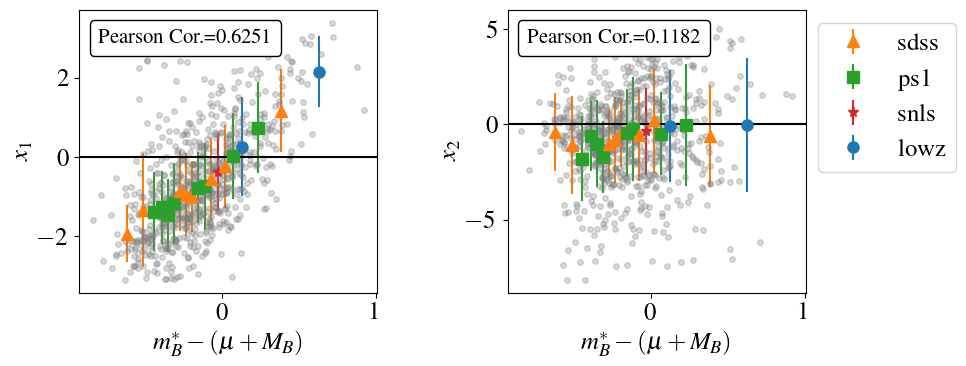

In [87]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(10,4))

for i in range(len(bins_mbmu_sort)):
    ax1.errorbar(bins_mbmu_sort[i],bins_x1_mbmu_sort[i],yerr=bins_x1_std_mbmu_sort[i],color=color_x1[i],marker=marker[i], markersize=8,ls="none")
    
ax1.plot(data_exp["mb_minus_mu"],data_exp["x1"],".",c="C7",markersize=8,alpha=0.3)
#ax1.errorbar(bins_mb_sort,bins_x1_mb_sort,yerr=bins_x1_std_mb_sort,marker="o", markersize=8,ls="none")
ax1.axhline(y=0.,c="k")
ax1.set_ylabel(r"$x_1$")
ax1.set_xlabel(r"$m_B^*-(\mu+M_B)$")
at1 = AnchoredText("Pearson Cor.=%.4f"%(round(np.corrcoef(data_exp["mb_minus_mu"],data_exp["x1"])[0][1],4)), prop=dict(size=15), frameon=True, loc='upper left')
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at1)

for i in range(len(bins_mbmu_sort)):
    ax2.errorbar(bins_mbmu_sort[i],bins_x2_mbmu_sort[i],yerr=bins_x2_std_mbmu_sort[i],color=color_x1[i],label=most_freq_surv_x1[i],marker=marker[i], markersize=8,ls="none")

ax2.plot(data_exp["mb_minus_mu"],data_exp["x2"],'.',c="C7",markersize=8,alpha=0.3)
#ax2.errorbar(bins_mbmu_sort,bins_x2_mbmu_sort,yerr=bins_x2_std_mbmu_sort,marker="o", markersize=8,ls="none")
ax2.axhline(y=0.,c="k")
ax2.set_ylabel(r"$x_2$")
ax2.set_xlabel(r"$m_B^*-(\mu+M_B)$")
at2 = AnchoredText("Pearson Cor.=%.4f"%(round(np.corrcoef(data_exp["mb_minus_mu"],data_exp["x2"])[0][1],4)), prop=dict(size=15), frameon=True, loc='upper left')
at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at2)
legend_without_duplicate_labels(ax2)

fig.tight_layout()
plt.savefig('./correlation_absolute_mag_fit_parameters_color_PCA.png',dpi=300,facecolor="white")  

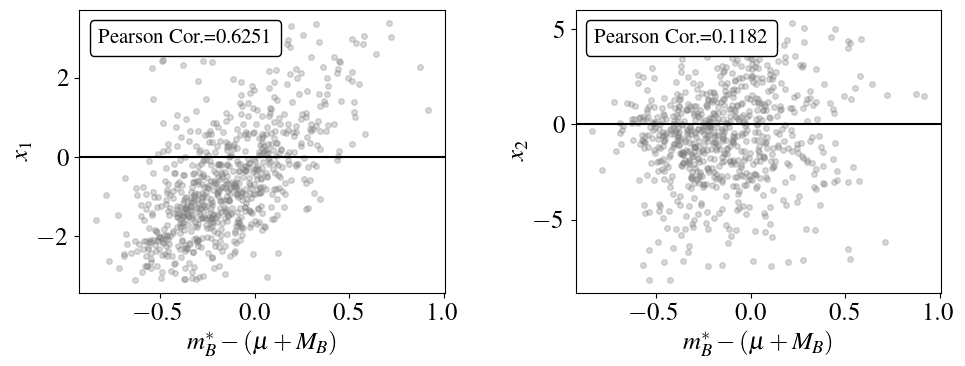

In [88]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(10,4))

#for i in range(len(bins_mbmu_sort)):
#    ax1.errorbar(bins_mbmu_sort[i],bins_x1_mbmu_sort[i],yerr=bins_x1_std_mbmu_sort[i],color=color_x1[i],marker=marker[i], markersize=8,ls="none")
    
ax1.plot(data_exp["mb_minus_mu"],data_exp["x1"],".",c="C7",markersize=8,alpha=0.3)
#ax1.errorbar(bins_mb_sort,bins_x1_mb_sort,yerr=bins_x1_std_mb_sort,marker="o", markersize=8,ls="none")
ax1.axhline(y=0.,c="k")
ax1.set_ylabel(r"$x_1$")
ax1.set_xlabel(r"$m_B^*-(\mu+M_B)$")
at1 = AnchoredText("Pearson Cor.=%.4f"%(round(np.corrcoef(data_exp["mb_minus_mu"],data_exp["x1"])[0][1],4)), prop=dict(size=15), frameon=True, loc='upper left')
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at1)

#for i in range(len(bins_mbmu_sort)):
#    ax2.errorbar(bins_mbmu_sort[i],bins_x2_mbmu_sort[i],yerr=bins_x2_std_mbmu_sort[i],color=color_x1[i],label=most_freq_surv_x1[i],marker=marker[i], markersize=8,ls="none")

ax2.plot(data_exp["mb_minus_mu"],data_exp["x2"],'.',c="C7",markersize=8,alpha=0.3)
#ax2.errorbar(bins_mbmu_sort,bins_x2_mbmu_sort,yerr=bins_x2_std_mbmu_sort,marker="o", markersize=8,ls="none")
ax2.axhline(y=0.,c="k")
ax2.set_ylabel(r"$x_2$")
ax2.set_xlabel(r"$m_B^*-(\mu+M_B)$")
at2 = AnchoredText("Pearson Cor.=%.4f"%(round(np.corrcoef(data_exp["mb_minus_mu"],data_exp["x2"])[0][1],4)), prop=dict(size=15), frameon=True, loc='upper left')
at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at2)
#legend_without_duplicate_labels(ax2)

fig.tight_layout()
plt.savefig('./correlation_absolute_mag_fit_parameters_PCA.png',dpi=300,facecolor="white")  